# Gramener Case Study



In the financial services industry, lending to customers is a fundamental business activity that carries inherent risks. Ensuring the sustainability and profitability of lending operations necessitates effective risk management strategies to minimize potential losses. This case study explores the methodologies and approaches employed by Gramener to mitigate the risk of financial loss while lending to customers.

### Problem Statement

I  work for a consumer finance company that specialises in providing various types of loans to urban customers. When the company receives a loan application, it has to decide whether to approve or reject it based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

- If the applicant is not likely to repay the loan, i.e., they are likely to default, then approving the loan may lead to financial loss for the company.

 

The data given below contains information about past loan applicants and whether they ‘defaulted’. The aim is to identify patterns indicating that a person is likely to default, which may be used to deny the loan, reduce the loan amount, lend (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of defaulting.

The data given below contains information about past loan applicants and whether they ‘defaulted’. The aim is to identify patterns indicating that a person is likely to default, which may be used to deny the loan, reduce the loan amount, lend (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of defaulting.

#### Importing required libraries

In [1]:
#import the warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#import the usefull libraries 
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
%matplotlib inline

##### The analysis of the given dataset is divided into four main parts:

 - Data understanding : Understanding  and getting familarised with the data.
- Data cleaning : Cleaning the data and looking for the null values.
- Data analysis: Analysing the data and plotting the required graphs.
- Conclusion 

#### Reading the given dataset

Read the given dataset

In [3]:
loan= pd.read_csv(r"C:\Users\hp\Downloads\loan (2).zip")
loan.head()
                  

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Getting familarised with dataset

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan.shape

(39717, 111)

**Insight**

- There are 39717 rows and 111 columns in  total

In [6]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
for i in loan.columns:
    print(i)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

## Data cleaning

#### Looking for null values

In [8]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
#looking for percentage of null values
round(loan.isnull().sum()/len(loan.index),2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

#### Removing or imputing the missing values

In [10]:
# as there are many columns which have null values in it sp we will remove the columns having more than 90 percent of the missing values
miss_columns=loan.columns[100*(loan.isnull().sum()/len(loan.index))>90]
print(miss_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [11]:
#dropping them
loan= loan.drop(miss_columns,axis=1)


In [12]:
loan.shape

(39717, 55)

In [13]:
#checking the null values percentage again
100*(loan.isnull().sum()/len(loan.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


##### There are 2 columns having approx 64 and 32 percentage of missing values 

In [14]:
loan[["desc","mths_since_last_delinq"]].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [15]:
#dropping desc and mths_since_last_delinq
loan=loan.drop(["desc","mths_since_last_delinq"],axis=1)

In [16]:
# Checking the percentage of null values again
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [17]:
#checking missing values in rows
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [18]:
# if the rows has more then 5 missing values
len(loan[loan.isnull().sum(axis=1)>5].index)

0

In [19]:
#analysing unique values in each column
loan.apply(pd.Series.nunique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [20]:
# deleting the columns with only 1 unique values because not required for analysis
loan=loan.loc[:,loan.nunique()!=1]

In [21]:
loan.shape

(39717, 44)

##### checking the datatype of the dataset  for furture analysis

In [22]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [23]:
#converting int_rate to float
loan["int_rate"]=loan["int_rate"].apply(lambda x: x.split("%")[0])
loan["int_rate"]= loan["int_rate"].astype(float)

In [24]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [25]:
# dropping the missing values from the column emp_length
loan= loan[~loan["emp_length"].isnull()]

In [26]:
loan.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [27]:
loan.emp_length.head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [28]:
#Extracting the numeric part from the variable employment length

# Droping the missing values from the column 
loan = loan[~loan['emp_length'].isnull()]

# writing a function numeric that will return digits from given string.

def numeric(n):
    string = ""
    for word in n:
        if word.isdigit():
            string = string + word
    return string

# Using numeric function to extract numeric values from the string
loan['emp_length'] = loan['emp_length'].apply(lambda x: numeric(x))

# converting to integer datatype
loan['emp_length'] = loan['emp_length'].astype('int64')

### Data analysis

In [29]:
# lets remove some of the columns which are not required
extra_columns = [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

In [30]:
df= loan.drop(extra_columns,axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   member_id             38642 non-null  int64  
 2   loan_amnt             38642 non-null  int64  
 3   funded_amnt           38642 non-null  int64  
 4   funded_amnt_inv       38642 non-null  float64
 5   term                  38642 non-null  object 
 6   int_rate              38642 non-null  float64
 7   installment           38642 non-null  float64
 8   grade                 38642 non-null  object 
 9   sub_grade             38642 non-null  object 
 10  emp_title             37202 non-null  object 
 11  emp_length            38642 non-null  int64  
 12  home_ownership        38642 non-null  object 
 13  annual_inc            38642 non-null  float64
 14  verification_status   38642 non-null  object 
 15  issue_d               38

In [32]:
# lets get rid of title,zip_code,addr_state and url
df=df.drop(["title","url","zip_code","addr_state"],axis=1)

In [33]:
#checking loan status
df["loan_status"]=df["loan_status"].astype("category")
df["loan_status"].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

In [34]:
#filtering only fully paid or charged off df
df=df[df["loan_status"]!="Current"]
df["loan_status"]=df["loan_status"].apply(lambda x:0 if x=="Fully Paid" else 1)


# converting loan status to int type
df["loan_status"]=df["loan_status"].apply(lambda x :pd.to_numeric(x))
#summarising the value
df["loan_status"].value_counts()

loan_status
0    32145
1     5399
Name: count, dtype: int64

In [35]:
#create new dataframe for loan to income ratio
loan["loan_inc_ratio"]= 100*(loan["loan_amnt"]/loan["annual_inc"])
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_inc_ratio
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,20.833333
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,8.333333
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,19.588639
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,20.325203
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,3.750000


In [36]:
loan['issue_month'] = loan['issue_d'].str.split('-').str[0]  # Extract month
loan['issue_year'] = loan['issue_d'].str.split('-').str[1]   # Extract year
loan["issue_year"]="20" + loan["issue_year"]
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_inc_ratio,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,20.833333,Dec,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,8.333333,Dec,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,19.588639,Dec,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,20.325203,Dec,2011
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,3.750000,Dec,2011


In [37]:
# lets extract the year and month from issue Date to separate column
loan['issue_month'] = loan['issue_d'].str.split('-').str[0]  # Extract month
loan['issue_year'] = loan['issue_d'].str.split('-').str[1]   # Extract year
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_inc_ratio,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,20.833333,Dec,11
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,8.333333,Dec,11
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,19.588639,Dec,11
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,20.325203,Dec,11
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,3.750000,Dec,11


In [38]:
loan["issue_year"] = loan["issue_year"].astype(str)

# Extract the last two digits of the year and prepend '20'
loan["issue_year"] = "20" + loan["issue_year"].str[-2:]

# Convert the year string to int type to remove leading zeros
loan["issue_year"] = loan["issue_year"].astype(int)

# Subtract 2000 from the year to get the desired format (e.g., 2011 instead of 202011)
loan["issue_year"] = 2000 + loan["issue_year"] - 2000
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_inc_ratio,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,20.833333,Dec,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,8.333333,Dec,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,19.588639,Dec,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,20.325203,Dec,2011
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,3.750000,Dec,2011


In [39]:
# getting the 25% 50 % and 75% quartiles
loan["loan_inc_ratio"].quantile([.25,.5,.75])

0.25     9.983330
0.50    16.483516
0.75    25.000000
Name: loan_inc_ratio, dtype: float64

In [40]:
#checking default rate
round(np.mean((df["loan_status"])*100),2)

14.38

In [88]:
# defining a function to plot default rate across categorical variables for further use
def plot_category(var):
    sns.barplot(x=var,y="loan_status",data=df)
    plt.title("Default Rates Across" +var.title())
    plt.show()
    

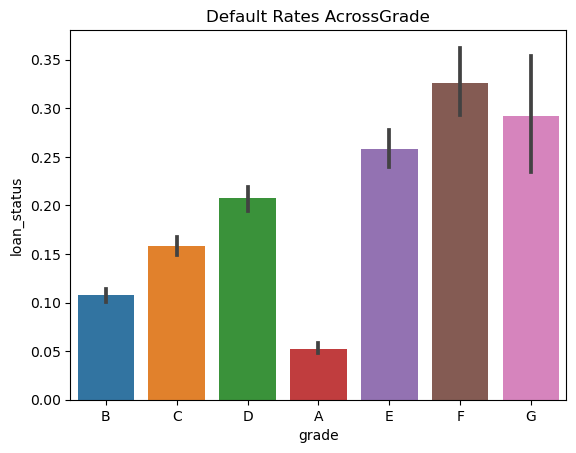

<Figure size 640x480 with 0 Axes>

In [90]:
plot_category("grade")

##### From the above graph it has been observed that  as grade goes from A to G the default rate increases. This is expected because the grade is decided by lending club based on the riskiness of the loan.

#### - Plotting default rates across term


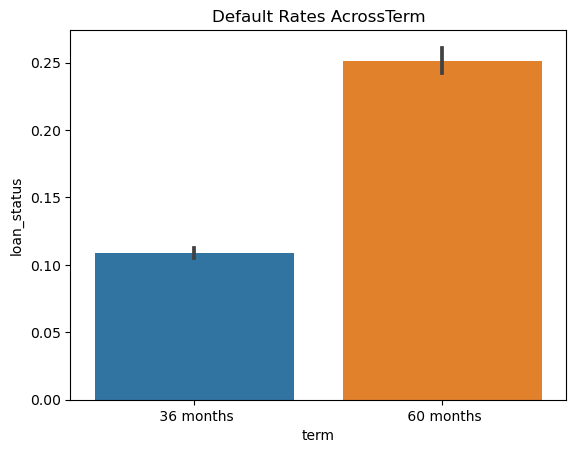

In [43]:
plot_category("term")

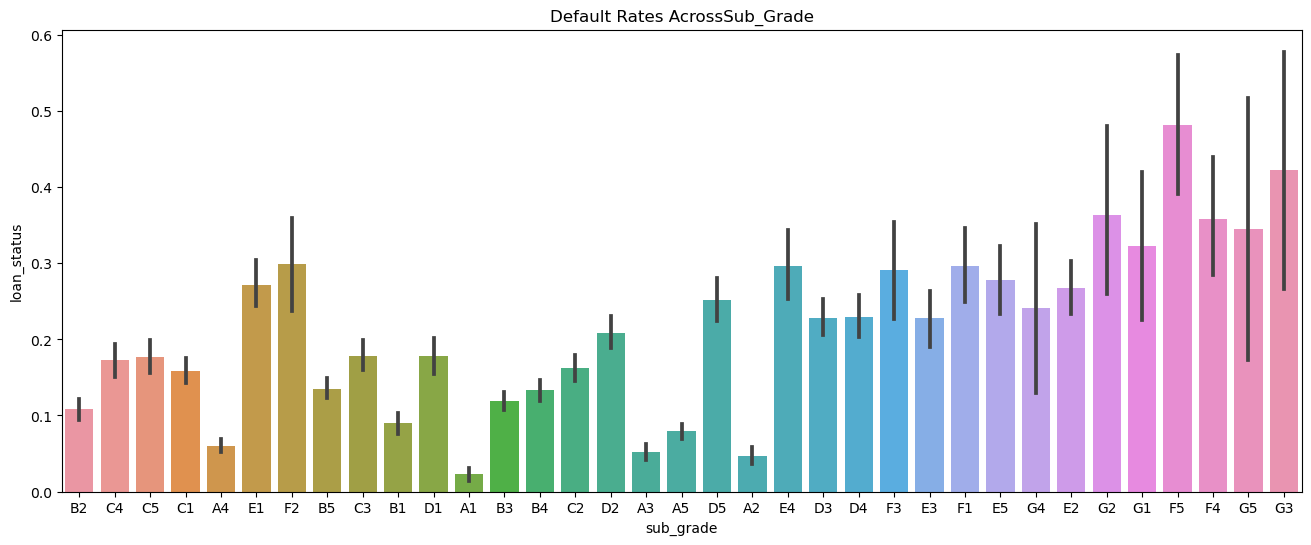

In [44]:
#subgrade accross default rate 
plt.figure(figsize=(16,6))
plot_category("sub_grade")

#### Plotting home ownership

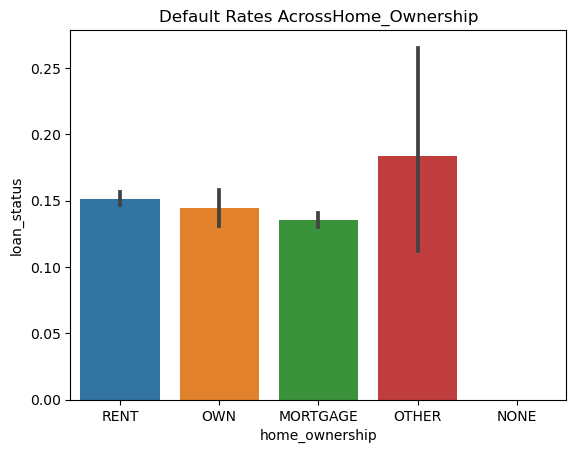

In [45]:
plot_category("home_ownership")

#### Plotting for verificaion status

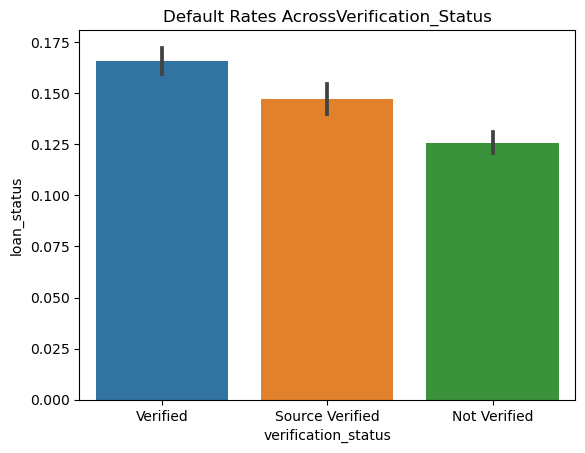

In [46]:
plot_category("verification_status")

##### From the above graph we can observe that verified loans have more default rate as compared to others

#### Plotting purpose of loan across default rate

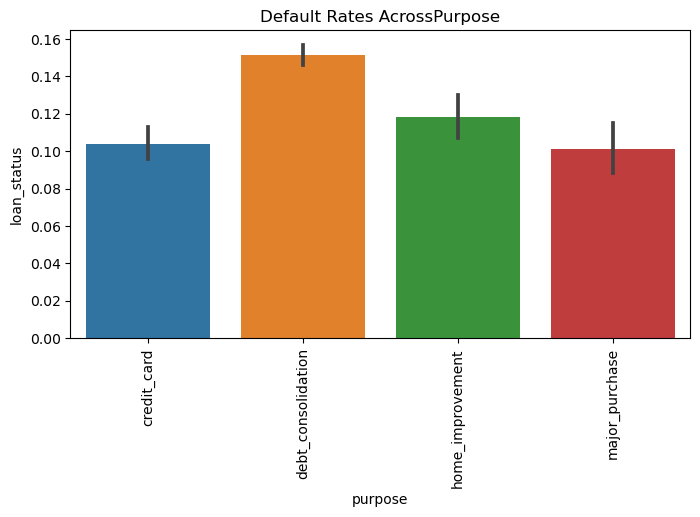

<Figure size 640x480 with 0 Axes>

In [100]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
plot_category("purpose")

#### Now lets observe the distribution of loans across years 
##### lets convert year column into datetime and then extract year and month from it

In [48]:
df["issue_d"].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [49]:
from datetime import datetime
df["issue_d"]=df["issue_d"].apply(lambda x: datetime.strptime(x,"%b-%y"))
df["issue_d"]

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 37544, dtype: datetime64[ns]

In [50]:
#extracting month and year from issue_d
df["month"]=df["issue_d"].apply(lambda x:x.month)
df["year"]= df["issue_d"].apply(lambda x:x.year)

In [51]:
df.groupby("year").year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

####  we have observed that as the years increase number of loans  have also increased

In [52]:
df.groupby("month").month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

#### lets now compare the default rate with years

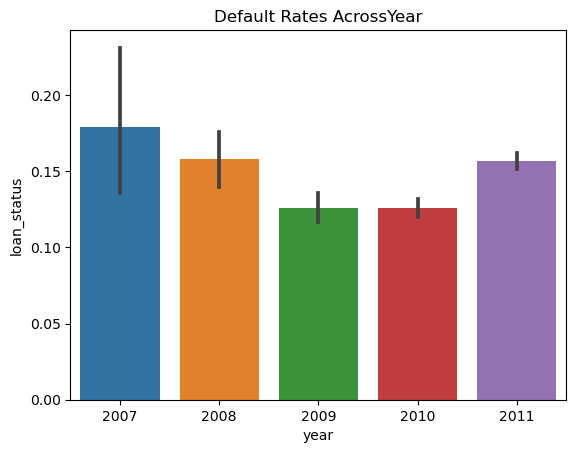

In [53]:
plot_category("year")

#### Comparing detault rates across months too

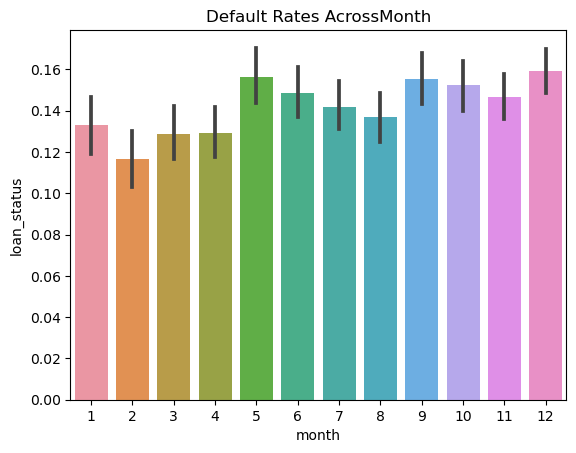

In [54]:
plot_category("month")

#### Lets see loan distribution amount

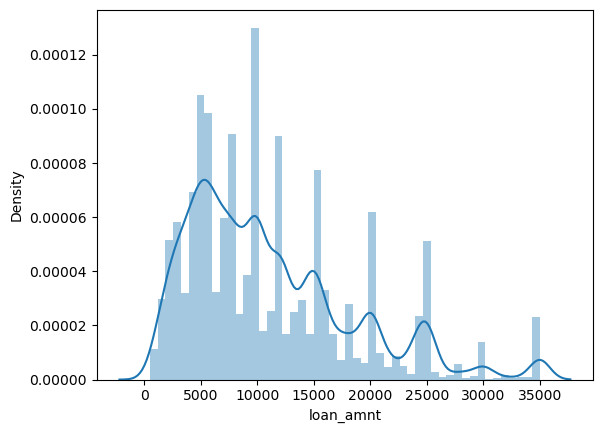

In [55]:
sns.distplot(df["loan_amnt"])
plt.show()

In [56]:
# lets make category to better understand
def loan_amount(n):
    if n<5000:
        return "low"
    elif n>= 5000 and n<15000:
        return "medium"
    elif n>= 15000 and n<25000:
        return "high"
    else:
        return "very high"
df["loan_amnt"]= df["loan_amnt"].apply(lambda x: loan_amount(x))
        

In [57]:
df["loan_amnt"].value_counts()

loan_amnt
medium       20157
high          7572
low           7095
very high     2720
Name: count, dtype: int64

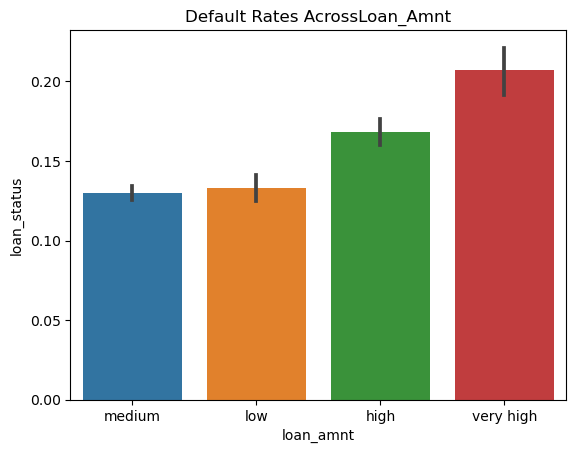

In [58]:
# plotting category wise 
plot_category("loan_amnt")

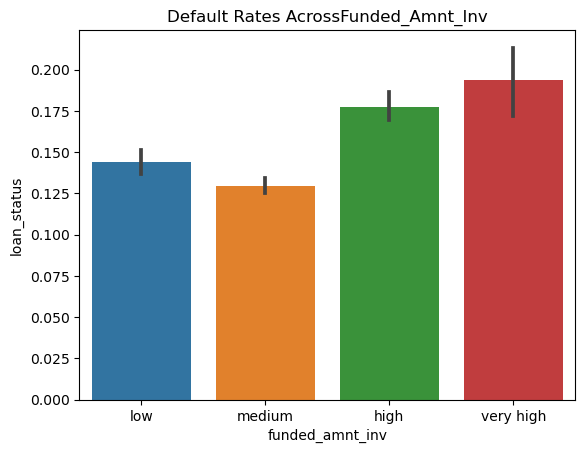

In [59]:
# converting funded amount into category wise
df["funded_amnt_inv"]=df["funded_amnt_inv"].apply(lambda x: loan_amount(x))
plot_category("funded_amnt_inv")

#### From the last 2 plots we have observed that as the default rate increases the amount and funded amount increases

In [60]:
# lets also convert interest rate into ,ow medium and high
def int_rate(n):
    if n <=10:
        return "low"
    elif n>10 and n <=15:
        return "medium"
    else:
        return "high"
df["int_rate"]=df["int_rate"].apply(lambda x: int_rate(x))

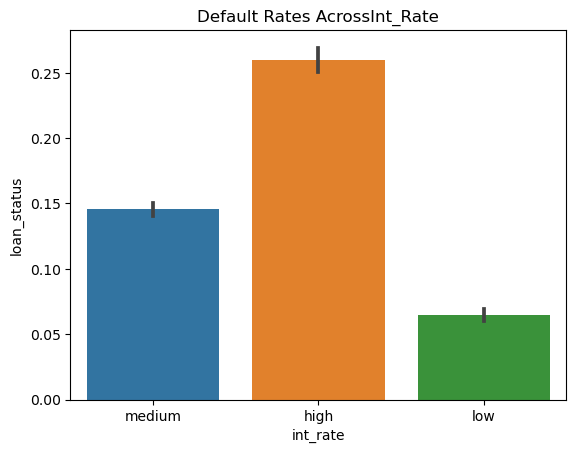

In [61]:
plot_category("int_rate")

#### from the above plot we observed that the higher the default rate has higher interest on ii

In [62]:
#dept to income ratio
def dti(n):
    if n<=10:
        return "low"
    elif n>10 and n <=20:
        return "medium"
    else:
        return "high"
df["dti"]= df["dti"].apply(lambda x: dti(x))

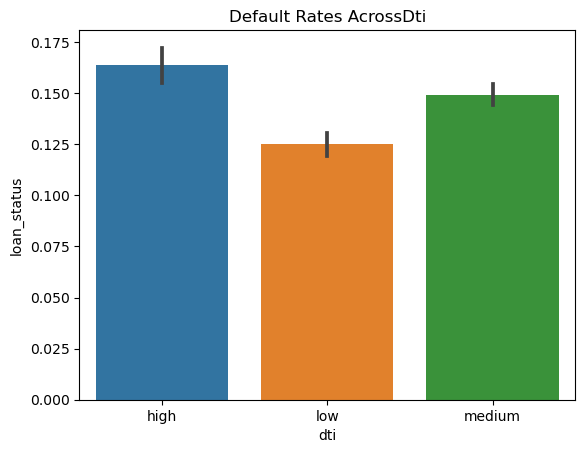

In [63]:
plot_category("dti")

In [64]:
# categorizing funded amount
def funded_amount(n):
    if n<=5000:
        return "low"
    elif n>5000 and n<=15000:
        return "medium"
    else:
        return "high"
df["funded_amnt"]=df["funded_amnt"].apply(lambda x:funded_amount(x))

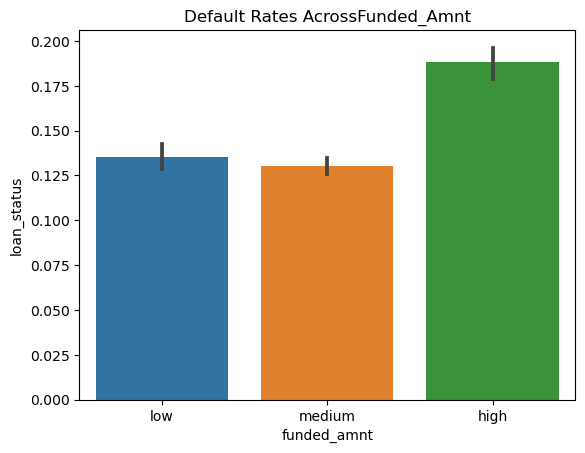

In [65]:
plot_category("funded_amnt")

In [66]:
# Categorizing installments
def installment(n):
    if n<=200:
        return "low"
    elif n>200 and n<=400:
        return "medium"
    elif n>400 and n<=600:
        return "high"
    else:
        return "very high"
df["installment"]=df["installment"].apply(lambda x: installment(x))

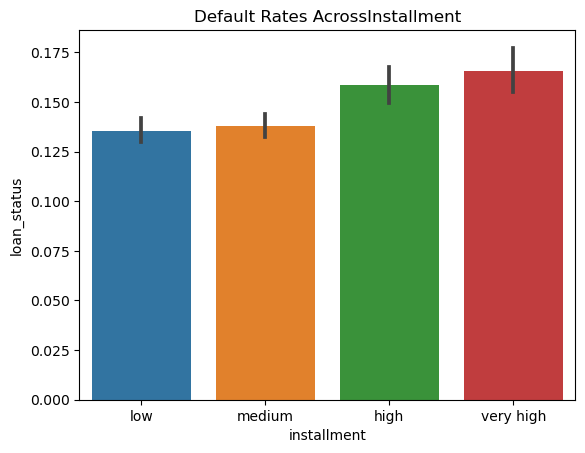

In [67]:
plot_category("installment")

#### as we can see that the installent is very high due to heavy interest  over default values 

In [68]:
# categorising annual income
def annual_income(n):
    if n<= 50000:
        return "low"
    elif n>50000 and n <= 100000:
        return "medium"
    elif n> 100000 and n <=150000:
        return "high"
    else:
        return "very high"
df["annual_inc"]=df["annual_inc"].apply(lambda x: annual_income(x))

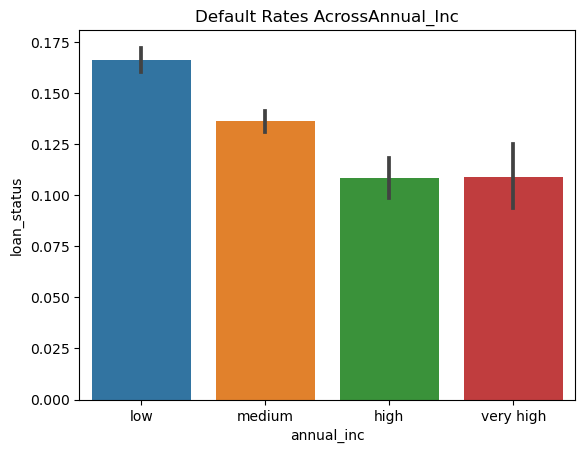

In [69]:
plot_category("annual_inc")

####  here we observe that having higher income have higher rate

In [70]:
#categorizing employment length to fresher,junior,senior and expert
df=df[~df["emp_length"].isnull()]

In [72]:
def emp_length(n):
    if n<=1:
        return "fresher"
    elif n >1 and n<=3:
        return "junior"
    elif n>3 and n<=7:
        return "senior"
    else:
        return "expert"
df["emp_length"]=df["emp_length"].apply(lambda x: emp_length(x))

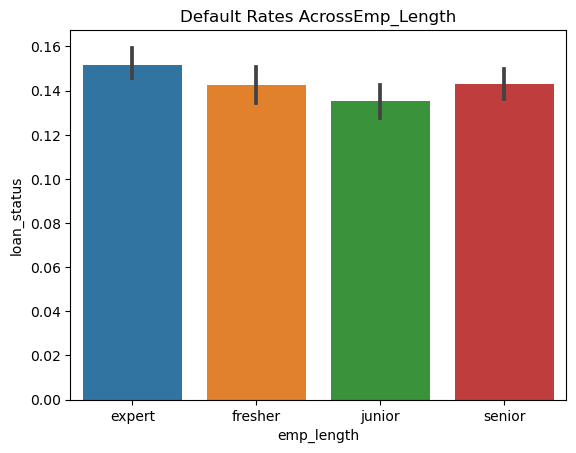

In [73]:
plot_category("emp_length")

#### Experts have higher rate and freshers and seniors have the same

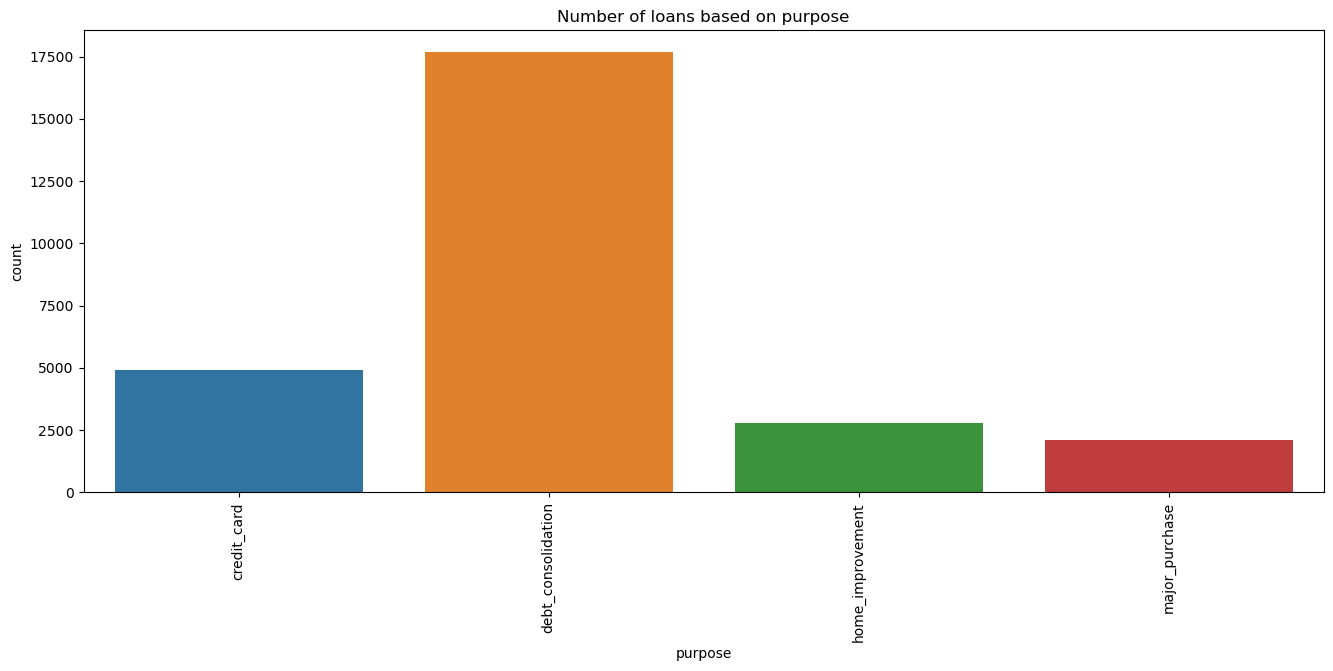

<Figure size 640x480 with 0 Axes>

In [97]:
# plotting a countplot of purpose
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.title("Number of loans based on purpose")
sns.countplot(x="purpose",data=df)
plt.show()
plt.savefig("plot.png")

#### So the top 4 types of loans based on purpose are 
- Consolidation
- Credit card
- home improvement 
- major purchase

In [75]:
#lets do some analysis on these categories
main_purpose=["credit_card","debt_consolidation","home_improvement","major_purchase"]
df=df[df["purpose"].isin(main_purpose)]
df["purpose"].value_counts()

purpose
debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: count, dtype: int64

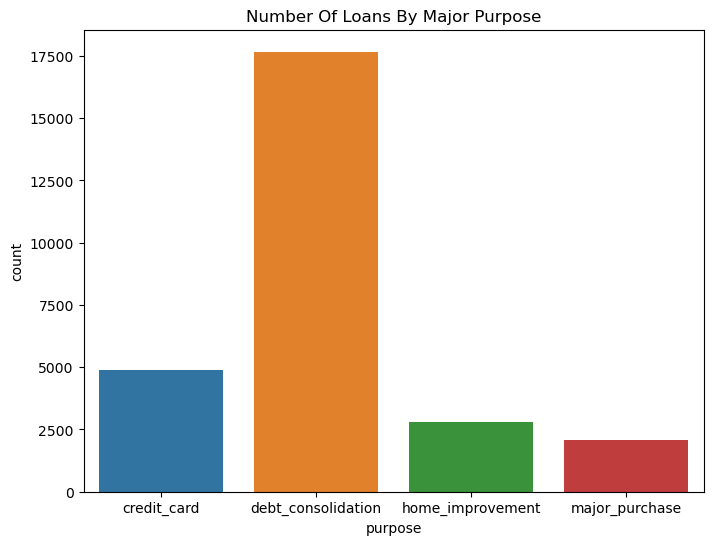

In [96]:
plt.figure(figsize=(8,6))
plt.title("Number of loans by major purpose".title())
sns.countplot(x=df["purpose"])
plt.show()

#### So debt_consolidation has the highest amoung all of them

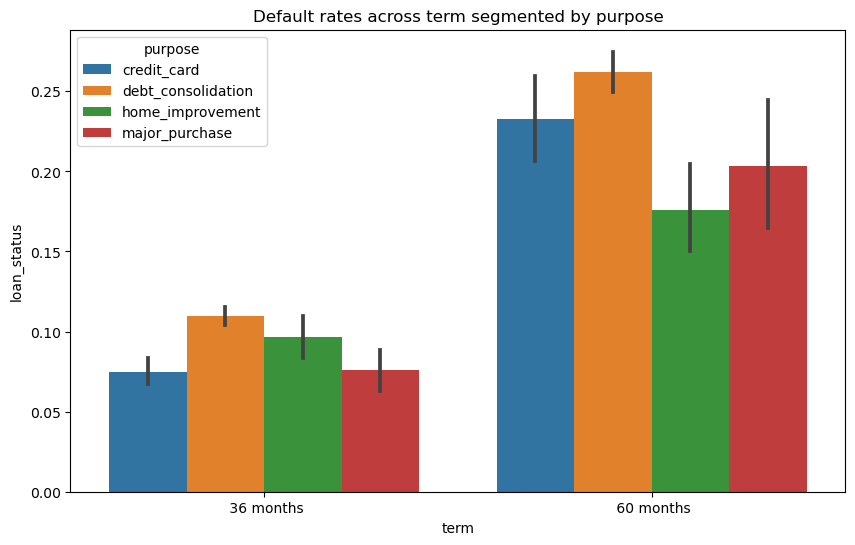

In [91]:
# comparing the default rate across two different type of categorical variables
# purpose of loan and another categorical variable(which changes)
plt.figure(figsize=(10,6))
plt.title("Default rates across term segmented by purpose")
sns.barplot(x="term",y="loan_status",hue="purpose", data=df)
plt.show()

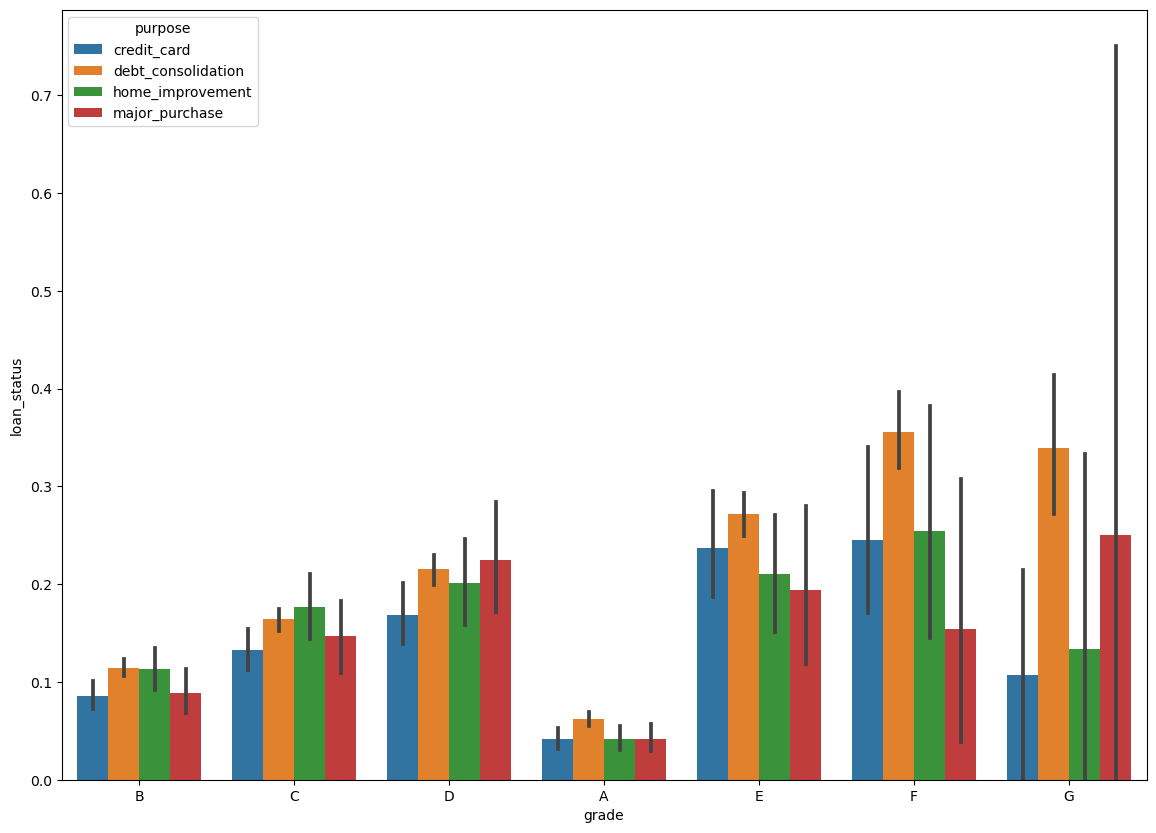

In [79]:
# function which takes the categorical variable and plots the default rate
# segmented by purpose
def plot_segmented(var):
    plt.figure(figsize=(14,10))
    sns.barplot(x=var,y="loan_status",hue="purpose",data=df)
    plt.show()
#grade of loan
plot_segmented("grade")

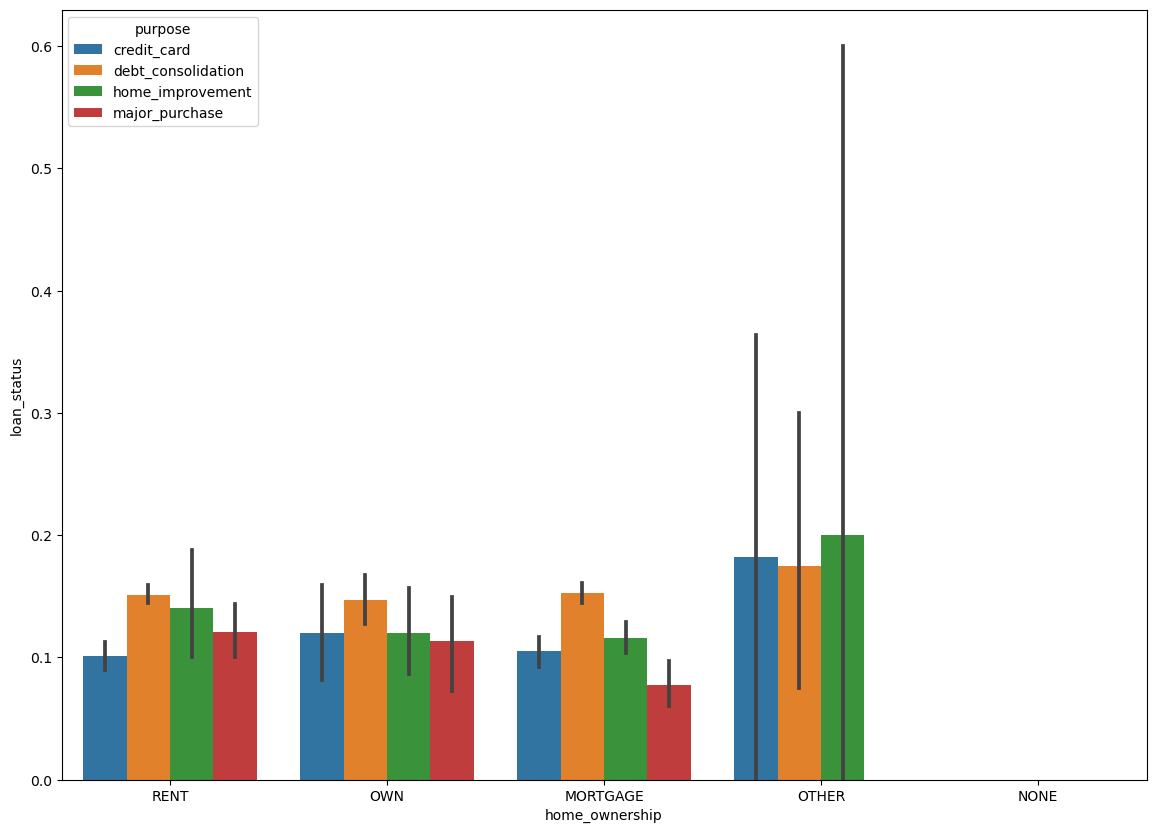

In [80]:
#plotting home ownership
plot_segmented("home_ownership")

#### Dept consideration have high among 3 catagory expect others

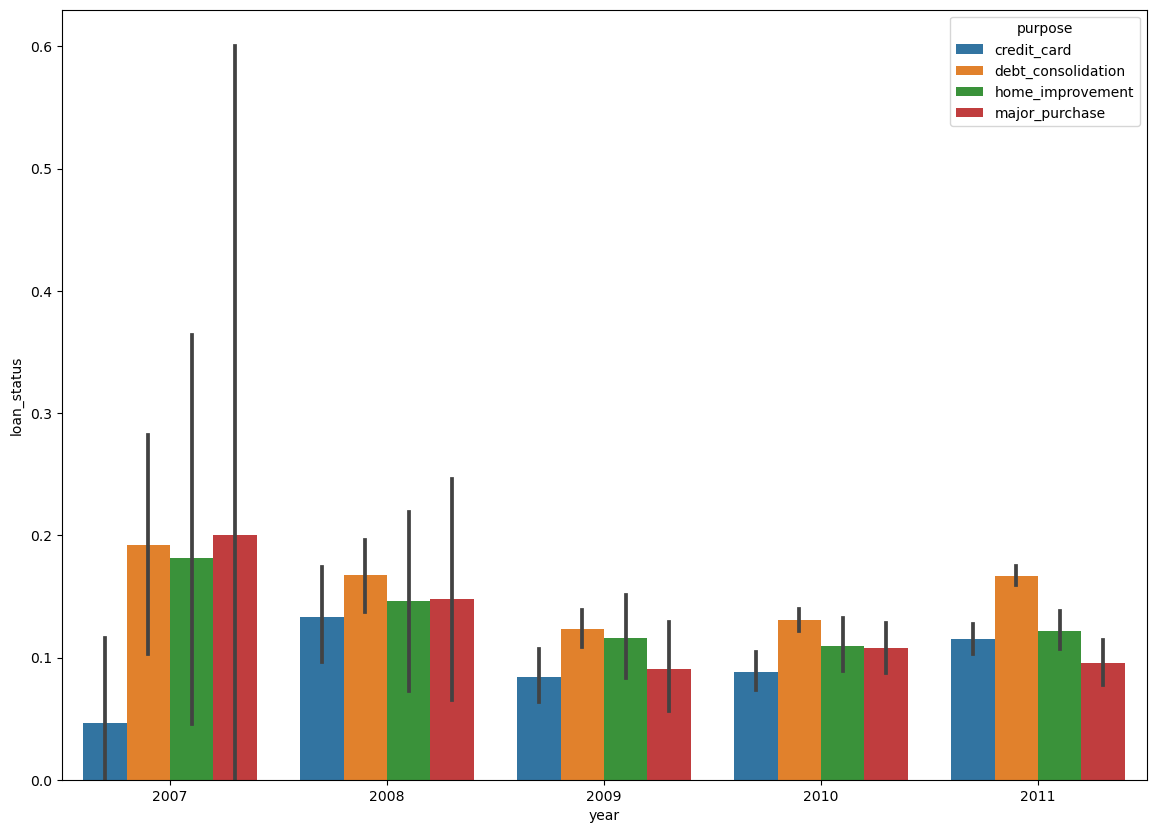

In [81]:
# plotting default rates across year segmented by purpose
plot_segmented("year")

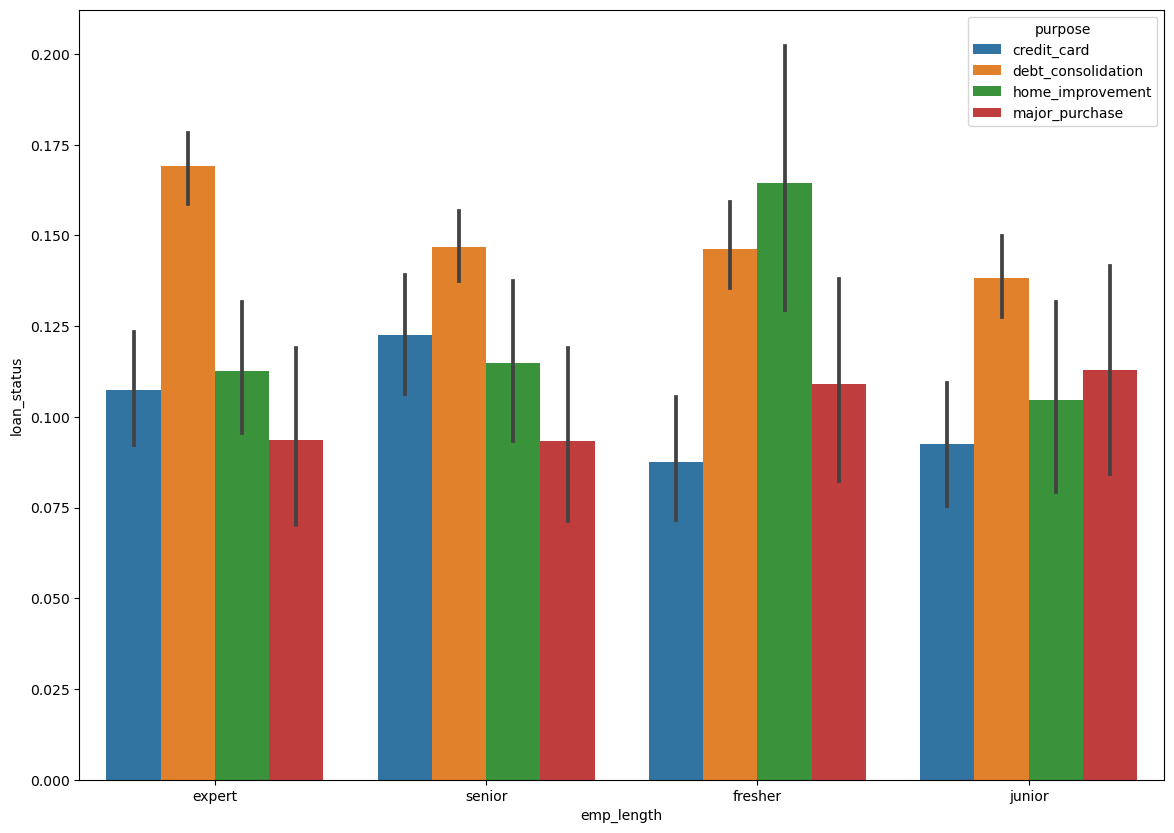

In [82]:
#ploting across employee length
plot_segmented("emp_length")

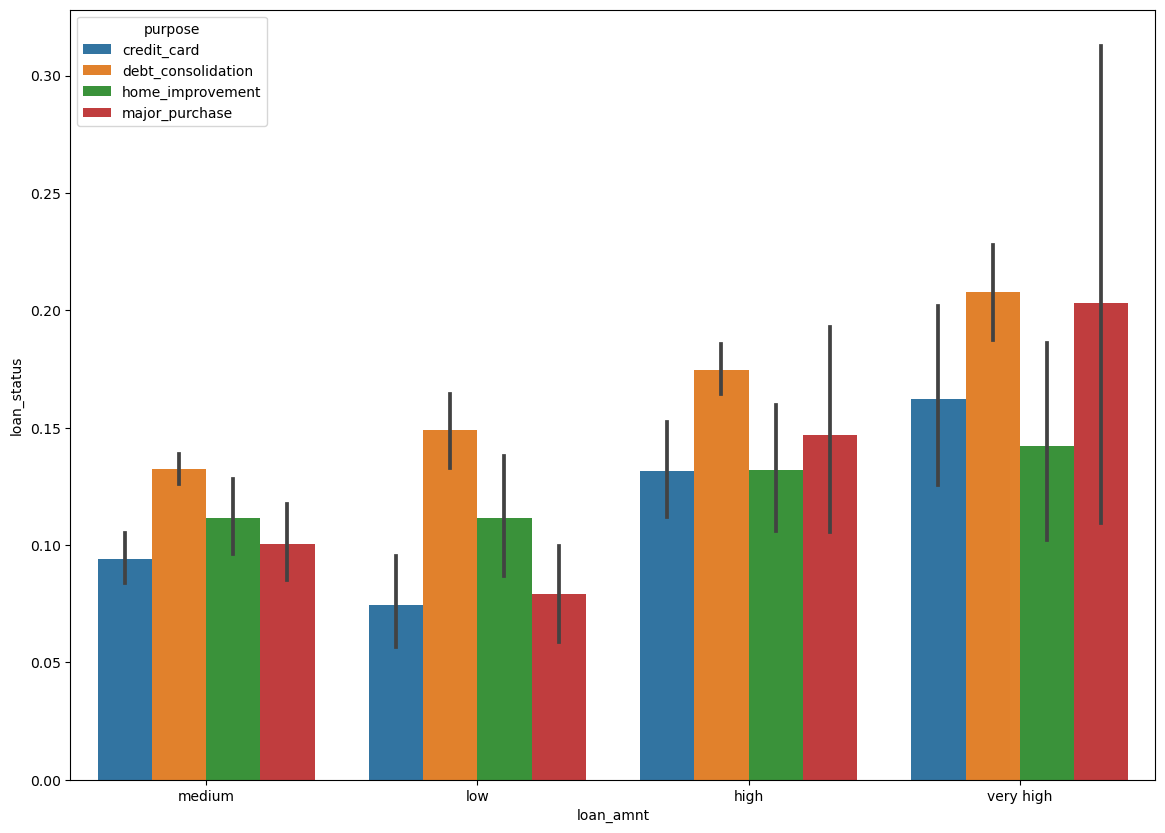

In [83]:
# plotting default rates across loan amount segmented by purpose
plot_segmented("loan_amnt")

<Figure size 400x0 with 0 Axes>

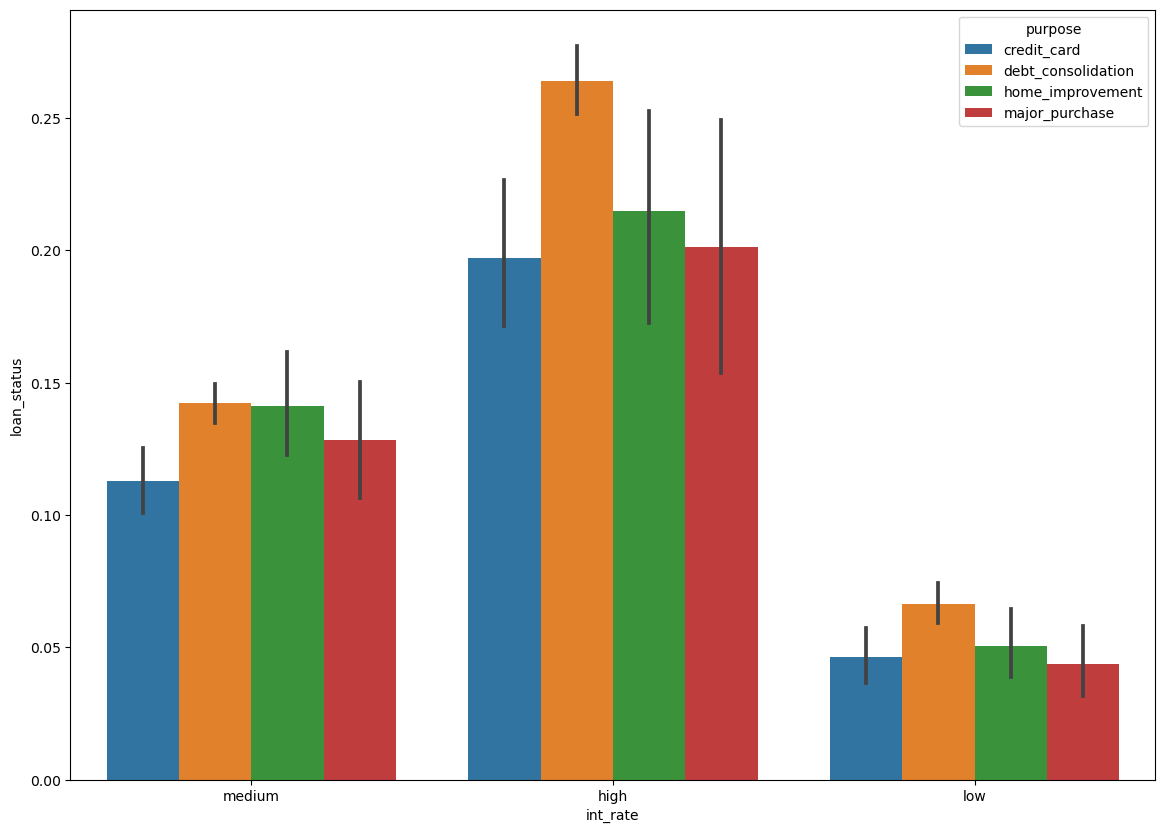

In [95]:
# ploting across int_ rate
plt.figure(figsize=(4,0))
plot_segmented("int_rate")

#### So it has observed that high interest rate has high dept consolidation

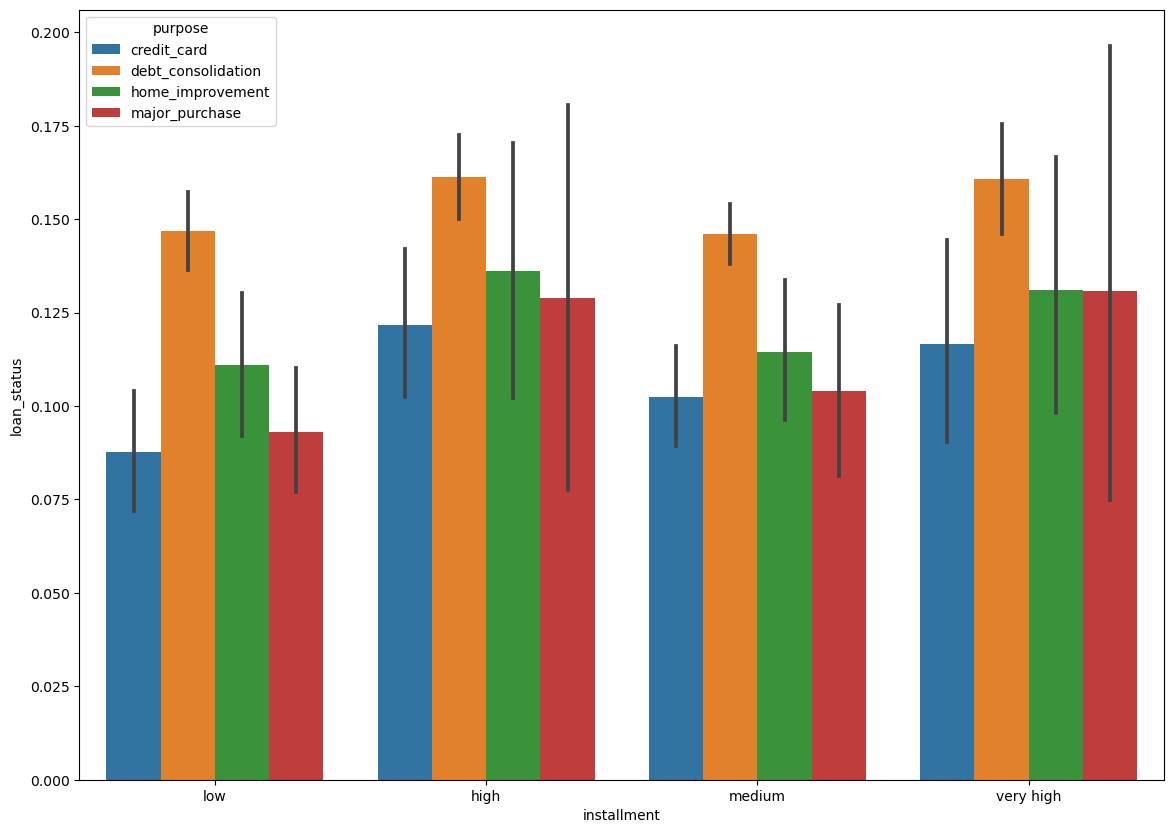

In [85]:
#ploting across installment segmented by purpose
plot_segmented("installment")

#### in low and medium category the home improvement and major purpose are almost same

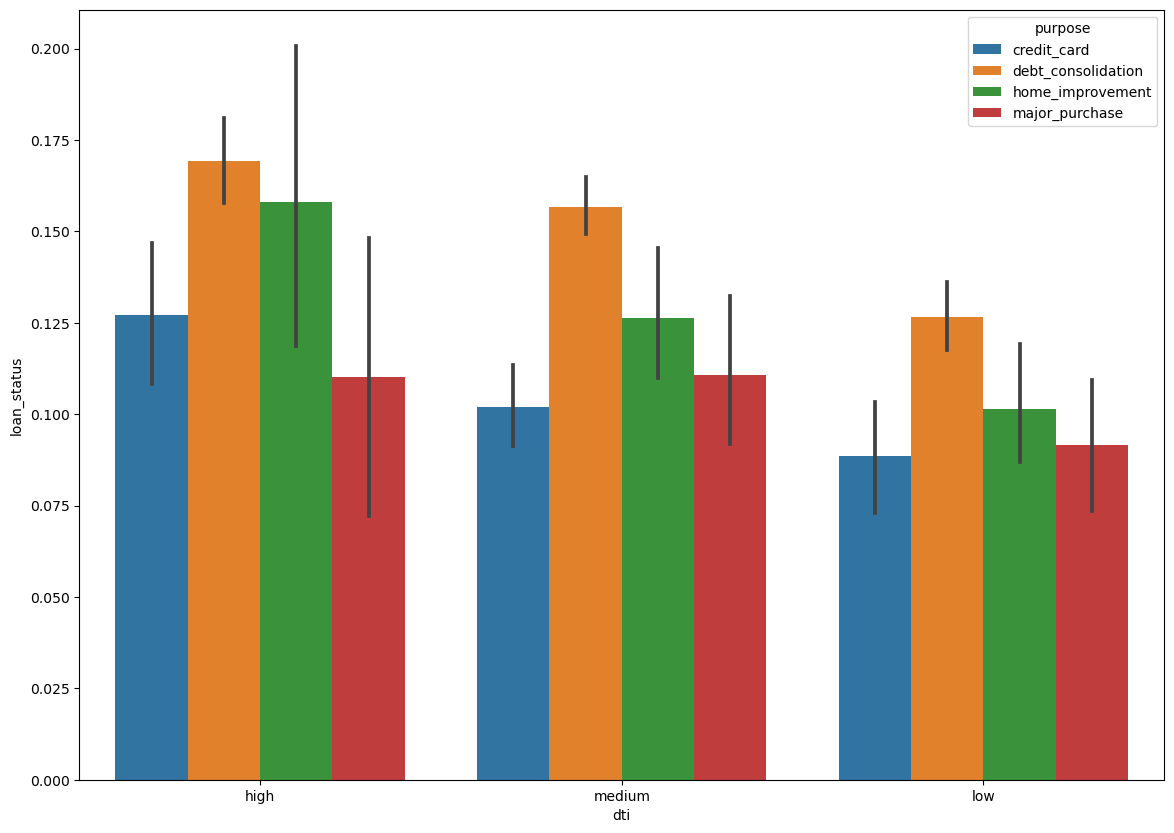

In [86]:
#dti
plot_segmented("dti")

#### here also dept consolidation are higher

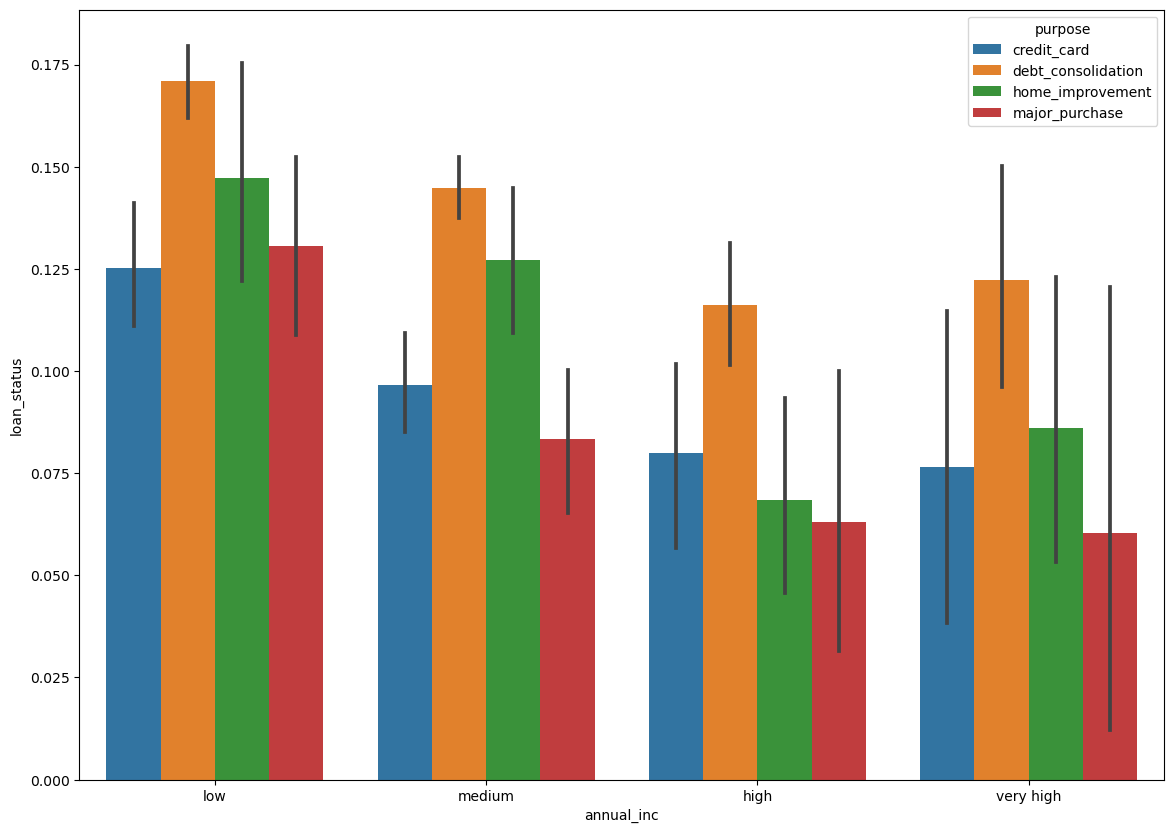

In [87]:
#annual_inc
plot_segmented("annual_inc")

#### as we can see dept consolidation loans have higher default rates

#### In all the plots plotted above we an observe that dept consolidation is higher among all of them

### Conclusion


- The grade of the loan goes from A to G , the default rate increases.This is expected because the grade is decided by Lending Club based on riskiness.
  of the loan
- Term : 60 months loan default more than 36 months loan
- Verification status: Verified loans default more than not verified
- If the default rate is high, the loan amount will also be high
- Experts have higher rate and freshers and seniors have the same
- default rate increases the amount and funded amount increases
- High dti transates into higher default rates
- Segmented univariate analysis doesnt yield much insight but it can be seen that debt consolidation loans tends to default frequently

#### Recommendation

##### The factors to consider while giving loans are:

- Annual income
- Term
- Interest rate
- Grade
-  Loan Amount
- Purpose